We can study behaviour by creating a mock dataset. Here, we live in an idealised world with a near-perfect neutrino detector. We assume that it can measure true neutrino energy perfectly, but has effective areas comparable to IceCube. We only consider the northern sky, and assume we have a background of atmospheric neutrinos that follow an exact power law E$^{-3.7}$ between 100 GeV and 10 PeV (the energy range of our detector).  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from flarestack.data.simulate.potemkin import potemkin_dataset, IdealBackgroundFluxModel
from flarestack.shared import flux_to_k
import logging
from flarestack.data.public import icecube_ps_3_year
logging.getLogger().setLevel("INFO")

In [2]:
# We create an imaginary dataset season, between 50000 MJD and 55000 MJD, with 100% uptime

bkg_time_pdf_dict = {
    "time_pdf_name": "fixed_ref_box",
    "fixed_ref_time_mjd": 50000,
    "pre_window": 0.,
    "post_window": 500.,
    "livetime": True
}

# We take the rough normalisation of the atmospheric flux, ~10^8 GeV cm^-2 s^-1 sr^-1 at ~200 TeV

f_200tev = (10. ** -8.)
flux_norm_1_gev = f_200tev * ((2.e5) ** 1.7)

bkg_flux_model = IdealBackgroundFluxModel(
    flux_norm_1_gev,
    bkg_time_pdf_dict=bkg_time_pdf_dict,
)

# We create a simulated dataset, containg only background, using the published effective areas for IceCube with 86 strings 2012

potemkin_dataset.set_sim_params(
    name="IC86-2012",
    bkg_flux_model=bkg_flux_model,
    resimulate=True
)

INFO:root:Minimum Energy is 100.0 GeV.
INFO:root:Maximum Energy is 10000000.0 GeV
INFO:root:Simulating events:
INFO:root:Simulated 3681 events between sin(dec)=0.020408163265306145 and sin(dec)=0.06122448979591821
INFO:root:Simulated 4491 events between sin(dec)=0.06122448979591821 and sin(dec)=0.1020408163265305
INFO:root:Simulated 5503 events between sin(dec)=0.1020408163265305 and sin(dec)=0.1428571428571428
INFO:root:Simulated 6435 events between sin(dec)=0.1428571428571428 and sin(dec)=0.18367346938775508
INFO:root:Simulated 7353 events between sin(dec)=0.18367346938775508 and sin(dec)=0.22448979591836715
INFO:root:Simulated 8231 events between sin(dec)=0.22448979591836715 and sin(dec)=0.26530612244897944
INFO:root:Simulated 8880 events between sin(dec)=0.26530612244897944 and sin(dec)=0.30612244897959173
INFO:root:Simulated 9425 events between sin(dec)=0.30612244897959173 and sin(dec)=0.346938775510204
INFO:root:Simulated 9869 events between sin(dec)=0.346938775510204 and sin(dec

We can investigate the properties of our simulated dataset:

In [3]:
# simseason = potemkin_dataset.get_seasons("IC86-2012")
# print(icecube_ps_3_year.get_seasons("IC86-2012"))
# print(icecube_ps_3_year.get_single_season("IC86-2012"))
print(potemkin_dataset.get_seasons().keys())
print(potemkin_dataset.get_seasons("IC86-2012").keys())
simseason = potemkin_dataset.get_single_season("IC86-2012")
# print(potemkin_dataset.get_seasons("IC86-2012").keys())

dict_keys(['IC86-2012'])
dict_keys(['IC86-2012'])


In [4]:
data = simseason.get_exp_data()

In [5]:
print(data.dtype.names)
print(data[:5])

('ra', 'dec', 'logE', 'sigma', 'time', 'sinDec', 'raw_sigma')
[(4.29228858, 0.03697125, 3.69441521, 0.01417927, 50183.67894468, 0.03696283, 0.01417927)
 (5.77170131, 0.05419848, 2.48549308, 0.03213151, 50065.65548595, 0.05417195, 0.03213151)
 (3.41302252, 0.02218301, 3.15177721, 0.01673769, 50322.12383959, 0.02218119, 0.01673769)
 (3.74944982, 0.0324151 , 2.74790452, 0.0236281 , 50383.01496549, 0.03240942, 0.0236281 )
 (6.02247068, 0.05137668, 2.17322056, 0.04605122, 50321.46873273, 0.05135408, 0.04605122)]


(array([10286., 15476., 20741., 22949., 24614., 25199., 26149., 26418.,
        26708., 21309.]),
 array([0.02041717, 0.11837483, 0.21633248, 0.31429014, 0.4122478 ,
        0.51020545, 0.60816311, 0.70612076, 0.80407842, 0.90203607,
        0.99999373]),
 <a list of 10 Patch objects>)

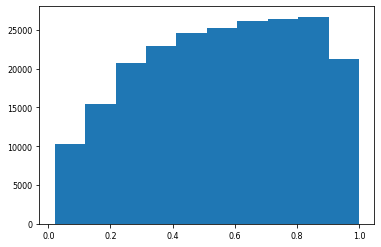

In [6]:
plt.hist(np.sin(data["dec"]))

(array([22057., 21800., 21599., 22202., 21910., 22059., 22197., 22088.,
        22070., 21867.]),
 array([8.31599869e-05, 6.28392197e-01, 1.25670123e+00, 1.88501027e+00,
        2.51331931e+00, 3.14162835e+00, 3.76993738e+00, 4.39824642e+00,
        5.02655546e+00, 5.65486449e+00, 6.28317353e+00]),
 <a list of 10 Patch objects>)

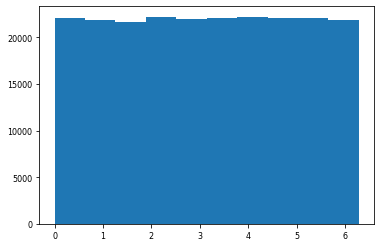

In [7]:
plt.hist(data["ra"])

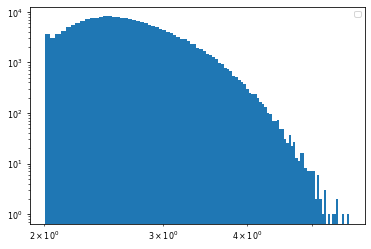

In [8]:
bins = plt.hist(data["logE"], bins=100)

# def fx(x):
#     return (10.**x)**-3.7 * np.mean(bins[1][0:2]) ** 3.7 * np.mean(bins[0][0:2])

# xrange = np.linspace(2.0, 5.0)

# plt.plot(10.**xrange, fx(xrange), label=r"E$^{-3.7}$")
plt.yscale("log")
plt.xscale("log")
plt.legend()


(array([22057., 22004., 21758., 21925., 21677., 22258., 22072., 21871.,
        22222., 22005.]),
 array([50000.00463996, 50050.0039714 , 50100.00330284, 50150.00263428,
        50200.00196572, 50250.00129716, 50300.0006286 , 50349.99996004,
        50399.99929148, 50449.99862293, 50499.99795437]),
 <a list of 10 Patch objects>)

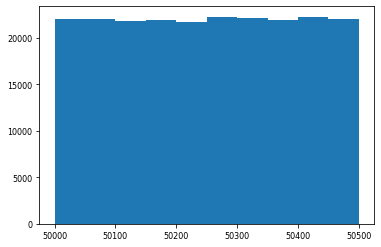

In [9]:
plt.hist(data["time"])

(array([  974., 28321., 43398., 34782., 28071., 29104., 21396., 14683.,
        10901.,  8219.]),
 array([0.38865411, 0.66450429, 0.94035447, 1.21620465, 1.49205483,
        1.767905  , 2.04375518, 2.31960536, 2.59545554, 2.87130572,
        3.1471559 ]),
 <a list of 10 Patch objects>)

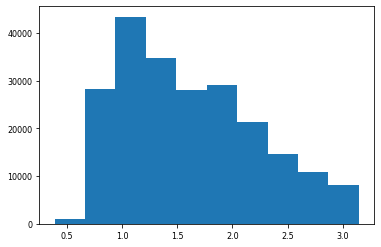

In [11]:
plt.hist(np.degrees(data["sigma"]))